#**Regression**

###**Linear Regression**

#####**Linear Regression for a Set of X Array and Given Equation Y**

In [31]:
#Example 1 Linear Regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
import numpy as np
from sklearn.linear_model import LinearRegression

#Representation of an array in numpy
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

# y = 5 * x_0 + 6 * x_1 + 3
#x_0 is the first element of each pair; #x_1 is the second element
#np.dot() is the product of two arrays
#Note 5 and 6 are the coefficients for the equation y

# y = np.dot(X, np.array([3, 7]))
# print(y)
# print("\n")

y = np.dot(X, np.array([3, 7])) + 3
print(y)
print("\n")

reg = LinearRegression().fit(X, y)
r2 = reg.score(X, y)
print("R-Square value for goodness of fit is:", r2)

if (r2 > 0.3 and r2 < 0.5) :
  print('The Goodness of Fit is Weak')
elif (r2 > 0.5 and r2 < 0.7):
  print('The Goodness of Fit is Moderate')
elif (r2 > 0.7):
  print('The Goodness of Fit is Strong!')
print("\n")

#Estimate coefficiencts for the linear regression problem.
#First coefficient is for x_0, and second is for x_1
print("The coefficients of x_0 and x_1 are:", reg.coef_)
print("\n")

#Intercept of the linear regression problem
print("The intercept of the linear regression line is:", reg.intercept_)
print("\n")

#Predict the y value for [3,5] - x_0 is 3, and x_1 is 5
print("The predicted value for x_0 = 3 and x_1 = 5 is:", reg.predict(np.array([[3, 5]])))
print("\n")


[13 20 23 30]


R-Square value for goodness of fit is: 1.0
The Goodness of Fit is Strong!


The coefficients of x_0 and x_1 are: [3. 7.]


The intercept of the linear regression line is: 3.0000000000000036


The predicted value for x_0 = 3 and x_1 = 5 is: [47.]




#####**One Feature and 2-D Plot for Building a Linear Regression Model**

The predicted Y value for BMI = 60 is:  [[496.86776361]]


The Coefficient is: [[10.20821955]]
The intercept of the linear regression line is: [-115.62540934]


Mean squared error is: 3482.5752980153225
Coefficient of determination (R-Square) is: 0.37527945628901904
The Goodness of Fit is Weak




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


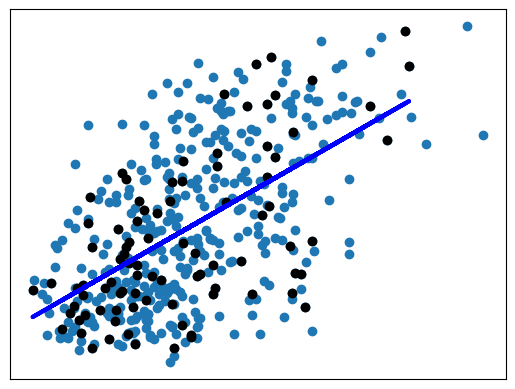

In [36]:
#Example 2 2-D Linear Regression Plot Part 3
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
#https://medium.com/the-code-monster/split-a-dataset-into-train-and-test-datasets-using-sk-learn-acc7fd1802e0

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#load dataset and remove white spaces
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/week8/diabetes2.xlsx')
# print(dataset.head())
# print("\n")

#Use only 1 feature - AGE to predict the target Y
diabetes_x = dataset[['BMI']]
diabetes_y = dataset[['Y']]

#The scatterplot evidence that seemingly there is a trend
plt.scatter(diabetes_x, diabetes_y)

#Split the dataset into training and testing sets (80%:20%)
x_train,x_test,y_train,y_test = train_test_split(diabetes_x, diabetes_y, test_size=0.2)
# print(x_train)
# print("\n")
# print(y_train)
# print("\n")
# print(x_test)

#Create linear regression object
regr = LinearRegression()

# Train the model using the training sets and reshape 1D arrays
regr.fit(x_train.values, y_train) #Here x.values will have only values without headers

# Make predictions using the testing set
y_pred = regr.predict(x_test)
y_pred2 = regr.predict([[60]])
print("The predicted Y value for BMI = 60 is: ", y_pred2)
print("\n")

# The coefficients
print('The Coefficient is:', regr.coef_)
print("The intercept of the linear regression line is:", regr.intercept_)
print("\n")

# The mean squared error
print('Mean squared error is:', mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination (R-Square) is:', r2)

if (r2 > 0.3 and r2 < 0.5) :
  print('The Goodness of Fit is Weak')
elif (r2 > 0.5 and r2 < 0.7):
  print('The Goodness of Fit is Moderate')
elif (r2 > 0.7):
  print('The Goodness of Fit is Strong!')
print("\n")

 # Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


###**Multiple Linear Regression**

#####**Multiple Linear Regression Models**

In [29]:
#Example  Multiple Linear Regression Plot and the prediction model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#load dataset and remove white spaces
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/week8/diabetes.txt', delimiter="\s+") # String is seperated by space or multiple spaces
# print(dataset.head())
# print("\n")

#Use only 1 feature - AGE to predict the target Y
diabetes_x = dataset[['BMI', 'BP' , 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
diabetes_y = dataset[['Y']]

#Split the dataset into training and testing sets (80%:20%)
x_train, x_test, y_train, y_test = train_test_split(diabetes_x, diabetes_y, test_size=0.2)
# print(x_train)
# print("\n")
# print(y_train)
# print("\n")
# print(x_test)

#Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

#Make prediction for the following:
pBMI = 30
pBP = 100
pS1 = 160
pS2 = 55
pS3 = 45
pS4 = 4.0
pS5 = 4.5
pS6 = 88
# print("\n")
print ('Predicted Y value: ', regr.predict([[pBMI, pBP, pS1, pS2, pS3, pS4, pS5, pS6]]))

# The coefficients
print('The Coefficients are:', regr.coef_)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination (R-Square) is:', r2)

if (r2 > 0.3 and r2 < 0.5) :
  print('The Goodness of Fit is Weak')
elif (r2 > 0.5 and r2 < 0.7):
  print('The Goodness of Fit is Moderate')
elif (r2 > 0.7):
  print('The Goodness of Fit is Strong!')
print("\n")

#Use statsmodel for model summary
diabetes_x = sm.add_constant(diabetes_x)
model = sm.OLS(diabetes_y, diabetes_x).fit()
predictions = model.predict(diabetes_x)
print_model = model.summary()
print(print_model)
print("\n")

#-------------------------------------------------------------------------------------------
# Y = -362.2533 + 6.0121*BMI + 0.9241*BP –0.9733*S1 + 0.6448*S2 + 0.4993*S3 + 4.6820*S4 + 68.4130*S5 + 0.1813*S6

# R-squared value is 0.500
# Adjusted R-squared value is 0.491

# F-Statistics
# P value < 0.05 (95% confidence level) and the specified model is significantly different from the base model.


Predicted Y value:  [[162.14979828]]
The Coefficients are: [[ 5.72726144  0.97553742 -0.59843985  0.41490339 -0.18298505 -0.90551718
  64.5775352   0.18911393]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Mean squared error:  3728.1292874340884
Coefficient of determination (R-Square) is: 0.40082172465138566
The Goodness of Fit is Weak


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     54.18
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.34e-60
Time:                        18:41:50   Log-Likelihood:                -2393.9
No. Observations:                 442   AIC:                             4806.
Df Residuals:                     433   BIC:                             4843.
Df Model:    

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#####**Data Visualisation for Multiple Regression Using Seaborn**

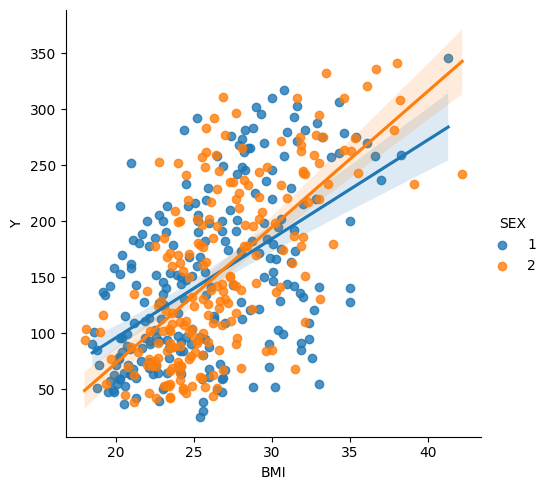

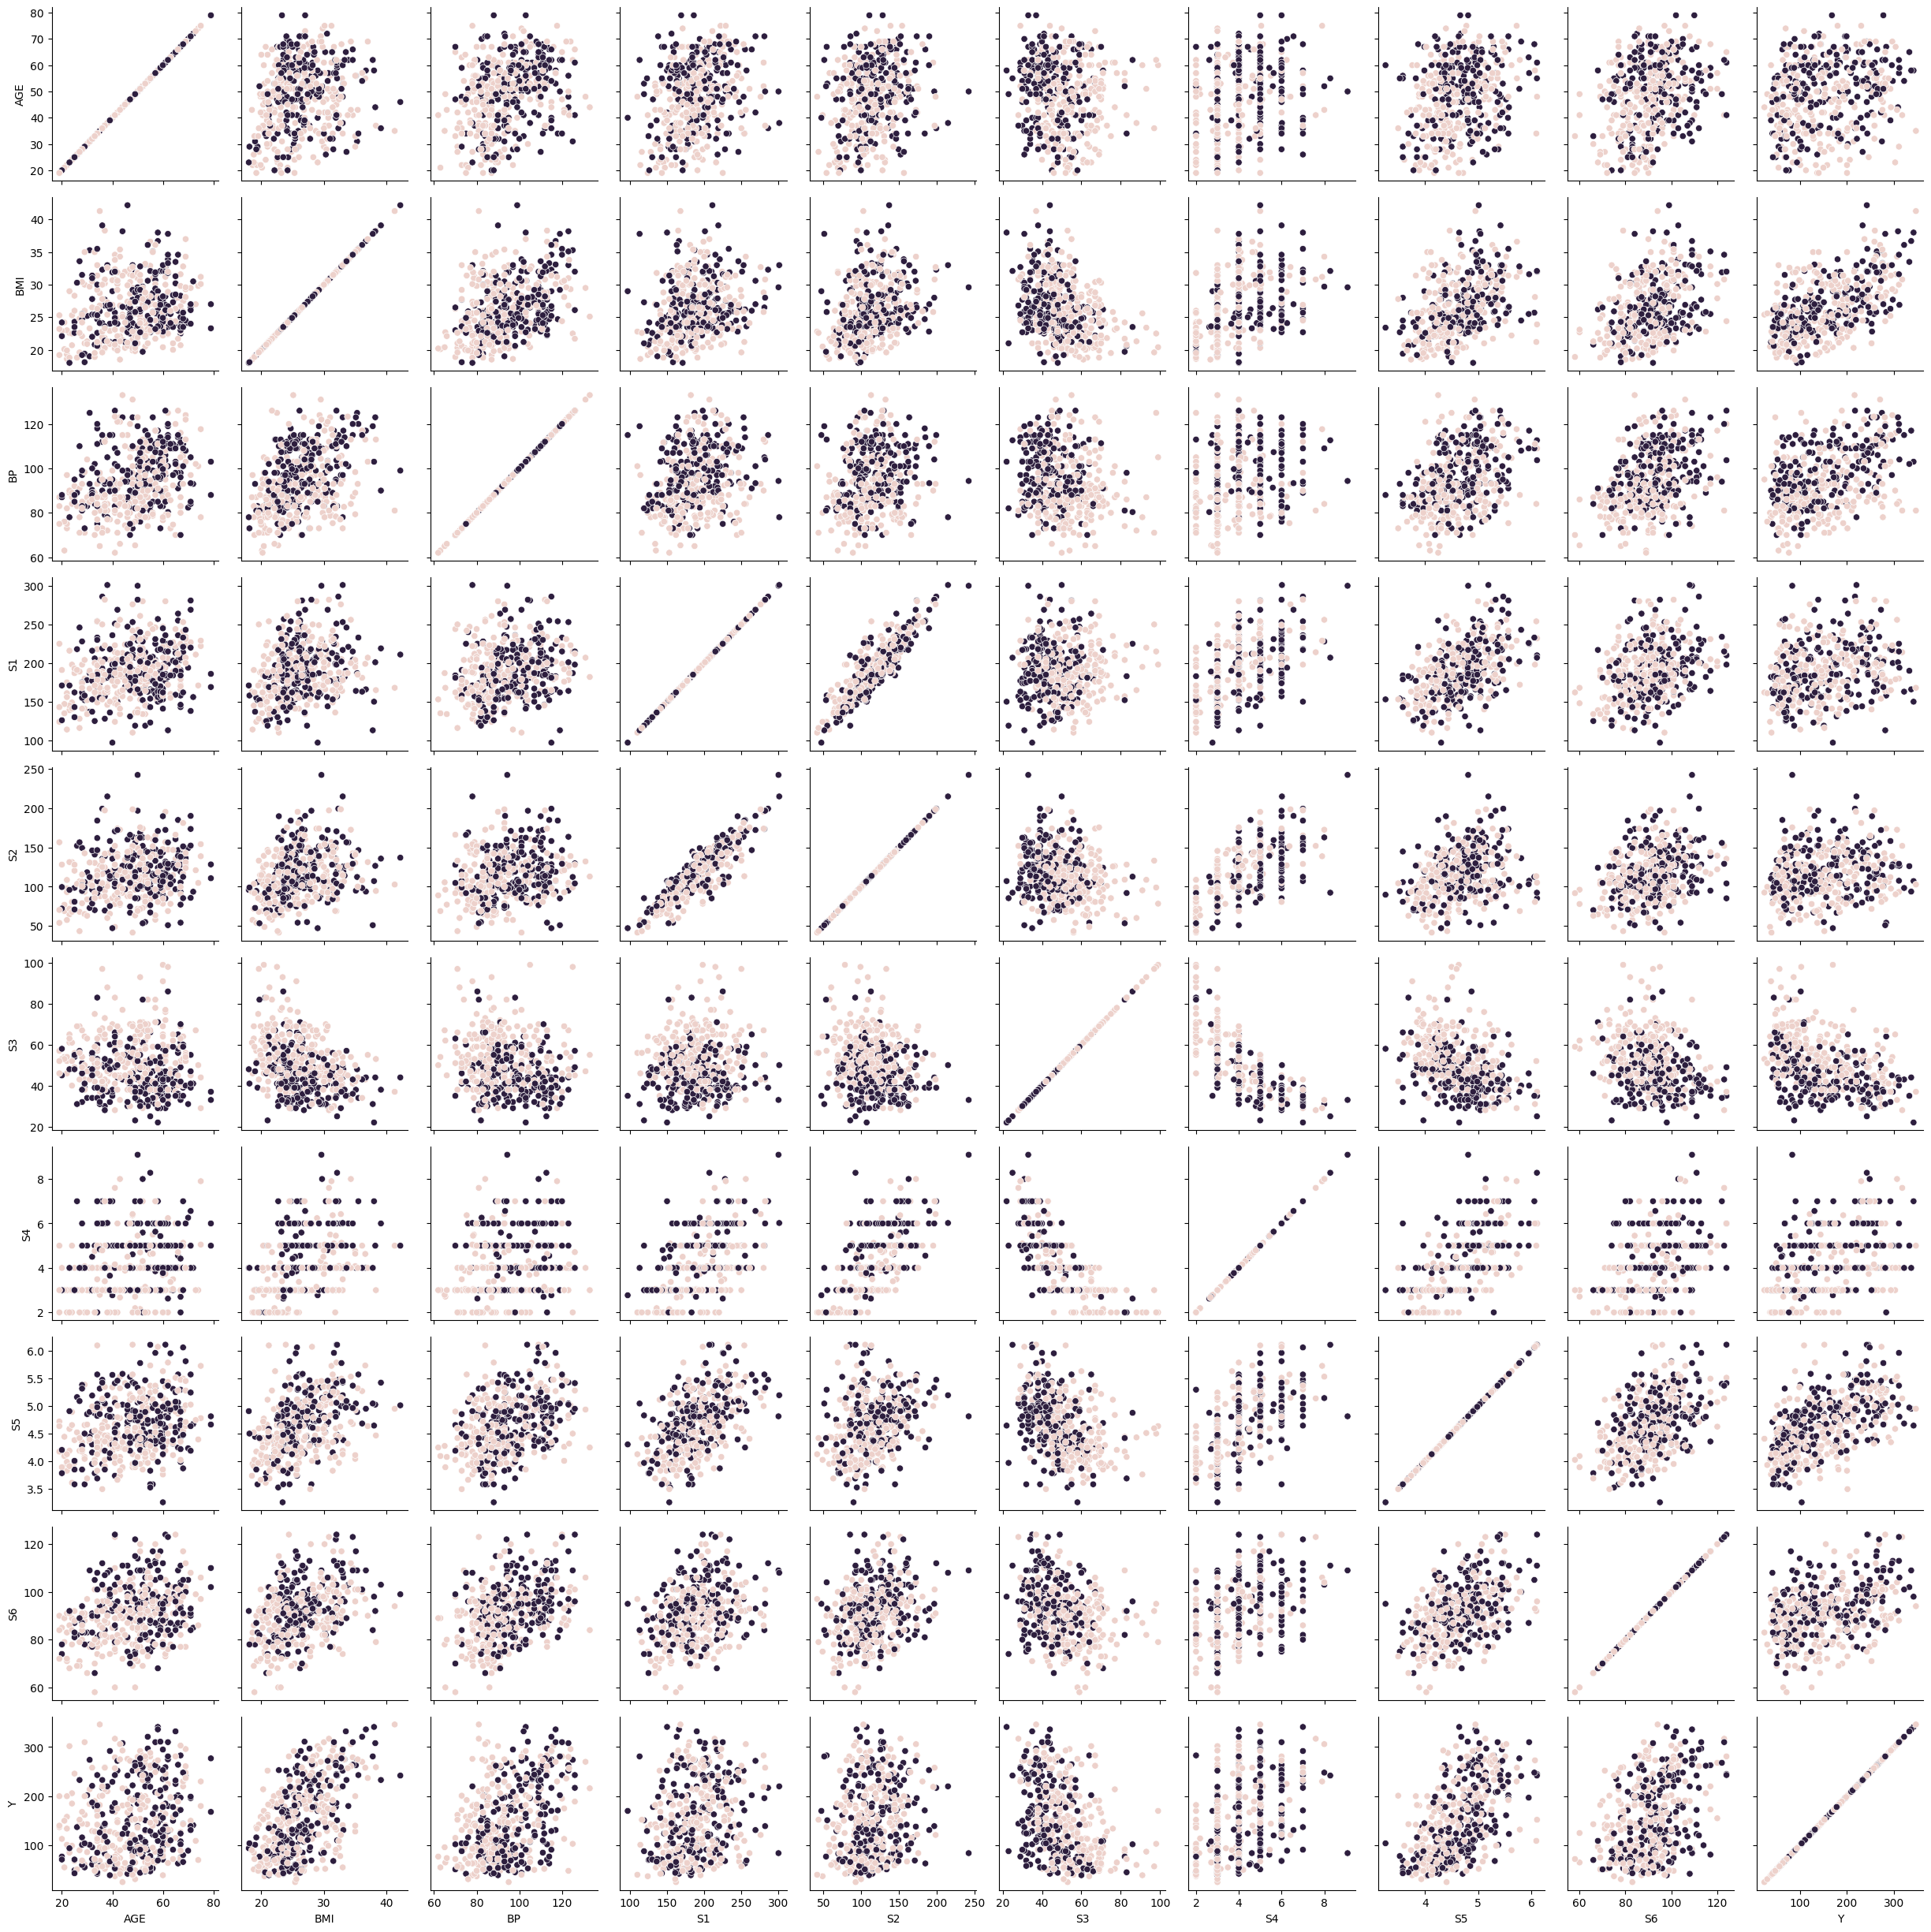

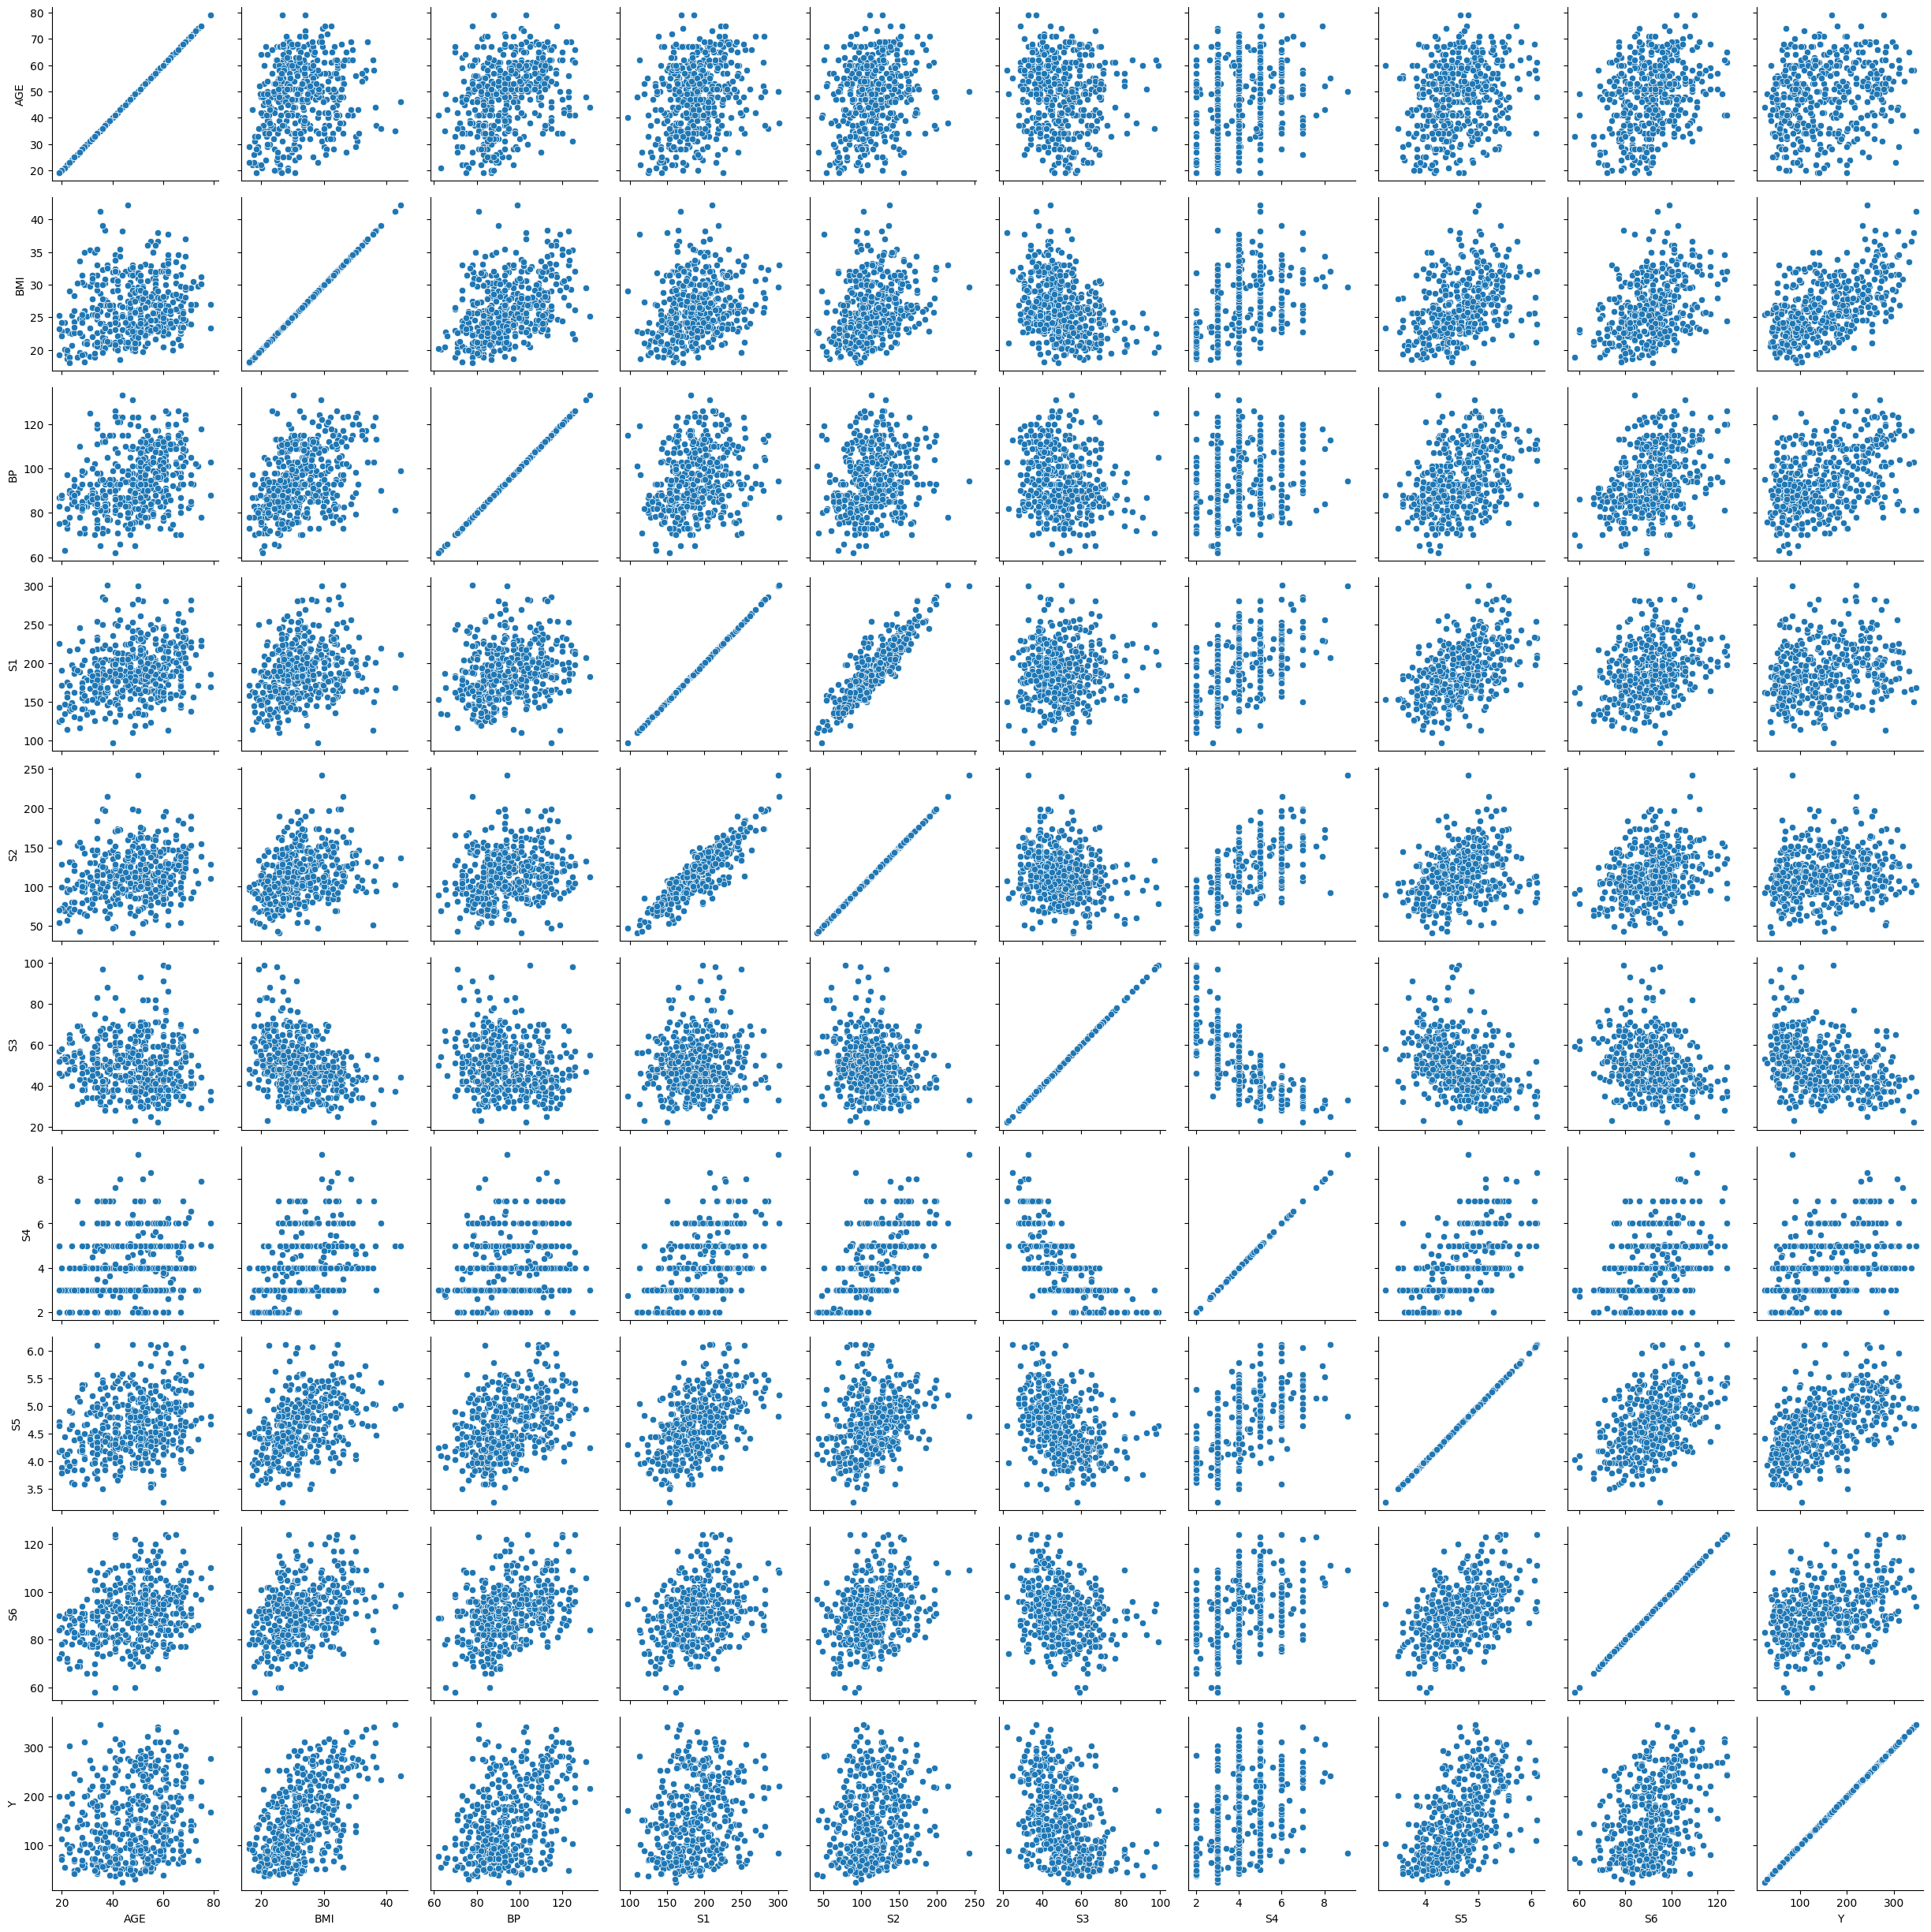

In [34]:
#Multiple Linear Regression Plot, prediction model, and the visual plot
import seaborn as sns
import pandas as pd

sns.set_style()

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/week8/diabetes.txt', delimiter="\s+")
dataset2 = dataset.drop(columns=['SEX'])
# print(dataset.head())

# Plot BMI and Y by Sex
g = sns.lmplot(data=dataset, x="BMI", y="Y", hue="SEX", height=5)

# Use more informative axis labels than are provided by default
g.set_axis_labels("BMI", "Y")

#Pairwise plot by SEX
g = sns.PairGrid(dataset, hue = "SEX")
g.map(sns.scatterplot)
print("\n")

#Pairwise plotg = sns.PairGrid(dataset2)
g = sns.PairGrid(dataset2)
g.map(sns.scatterplot)


###**Logistic Regression**

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64




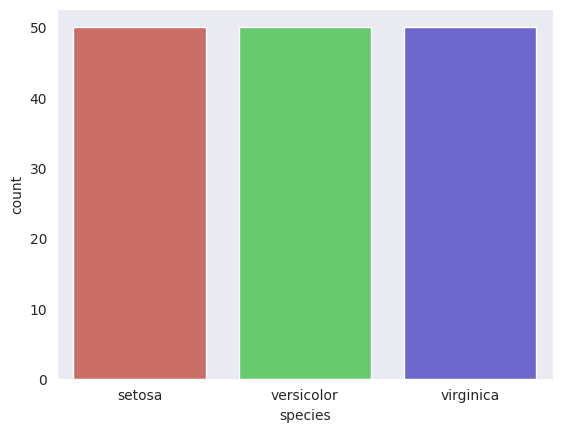



     sepal_length  sepal_width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[150 rows x 2 columns]


If the input values for sepal length and width are 5.8 and 3.05, then      the predicted species is  ['versicolor']
If the input values for sepal length and width are 5.0 and 3.6, then      the predicted species is  ['setosa']
If the input values for sepal length and width are 5.8 and 3.05, then      the prediction probabilities for setosa, versicolor, and virginica are:  [[0.14370828 0.53415188 0.32213984]]
If the input values for sepal length and width are 5.0 and 3.6, then      the prediction probabilities for setosa, versicolor, and virginica are:  [[0.96263927 0.0289769  0.00838382]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


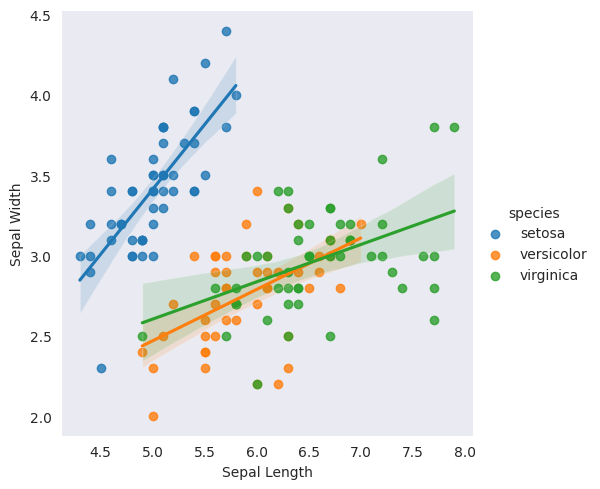

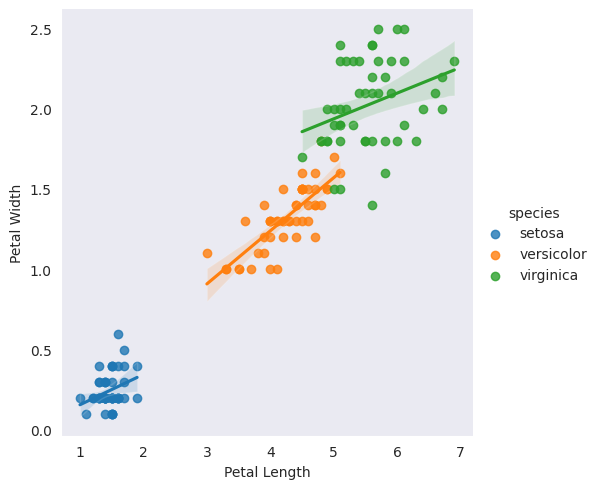

In [38]:
#Logistic regression classifier
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

#Load dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/week8/iris.txt', delimiter = ',')
# print(dataset.head())
# print("\n")

#Explore the dataset
# print(dataset.info())
# print("\n")

#Any missing data
print(dataset.isnull().sum())
print("\n")

#Level 1 Descriptive Statistics
# print(dataset.describe())
# print("\n")

#Level 2 Inferential Statistics
#Do on your own - correlation and t-test, chi square, etc....

#We shall explore visualisation of the dataset
#Visualisation explore each feature with species
#Count how many records with species = setosa, versicolor, virginica (for the target variable)
print(dataset['species'].value_counts())
print("\n")

#sns palette https://seaborn.pydata.org/tutorial/color_palettes.html
sns.set_style('dark')
sns.countplot(x='species', data=dataset, palette='hls')
plt.show()

#Plot multiple graphs for sepal length against sepal width for all the 3 species of irises
g = sns.lmplot(
    data=dataset,
    x="sepal_length", y="sepal_width", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal Length", "Sepal Width")

#Plot multiple graphs for petal length against petal width for all the 3 species of irises
g = sns.lmplot(
    data=dataset,
    x="petal_length", y="petal_width", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Petal Length", "Petal Width")


#Logistic Regression 1 - We shall only use first two features
X = dataset.iloc[:, 0:2]
#This is the same as column 0 and 1 => X = dataset[['sepal_width', 'sepal_length']]
Y = dataset['species']
print("\n")
print(X)
print("\n")

#Explanation for parameters in Logistic Regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logreg = LogisticRegression()

# Create an instance of Logistic Regression Classifier and fit the data.
model = logreg.fit(X, Y)

#Use the logistic Model to Predict the species given the sepal lenths and widths
Xnew = [[5.8,3.05]]
ynew = model.predict(Xnew)
print('If the input values for sepal length and width are 5.8 and 3.05, then \
     the predicted species is ', ynew)

Xnew2 = [[5.0,3.6]]
ynew2 = model.predict(Xnew2)
print('If the input values for sepal length and width are 5.0 and 3.6, then \
     the predicted species is ', ynew2)

 #Probability prediction - the probability an instance in a given species
Xnew3 = [[5.8,3.05]]
ynew3 = model.predict_proba(Xnew3)
print('If the input values for sepal length and width are 5.8 and 3.05, then \
     the prediction probabilities for setosa, versicolor, and virginica are: ', ynew3)

Xnew4 = [[5.0,3.6]]
ynew4 = model.predict_proba(Xnew4)
print('If the input values for sepal length and width are 5.0 and 3.6, then \
     the prediction probabilities for setosa, versicolor, and virginica are: ', ynew4)

 #Repeat logistic regression for petal length and petal width
#Repeat the logistic regression for the sepal and petal length and width
